<a href="https://colab.research.google.com/github/mirrorball108/EEG-analysis-of-Autism-patients/blob/main/autism_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# **ANOVA**

In [ ]:
df_pre=pd.read_csv('/content/pre_treatement_combined.csv')
df_pre.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
0,-65,3,-16,20,5,-4,-65,84,26,-71,-7,-8,76,-40,-44,28
1,-108,41,-17,16,-28,183,-85,79,22,-86,5,-10,201,-12,-42,2
2,-177,102,-20,12,-84,481,-113,69,16,-111,25,-14,402,30,-41,-38
3,-270,177,-23,6,-157,849,-145,55,2,-144,51,-19,647,81,-40,-87
4,-383,260,-26,-1,-242,1250,-178,37,-21,-184,80,-26,911,137,-42,-140


F-statistic: 9.2620
P-value: 3.8632e-22


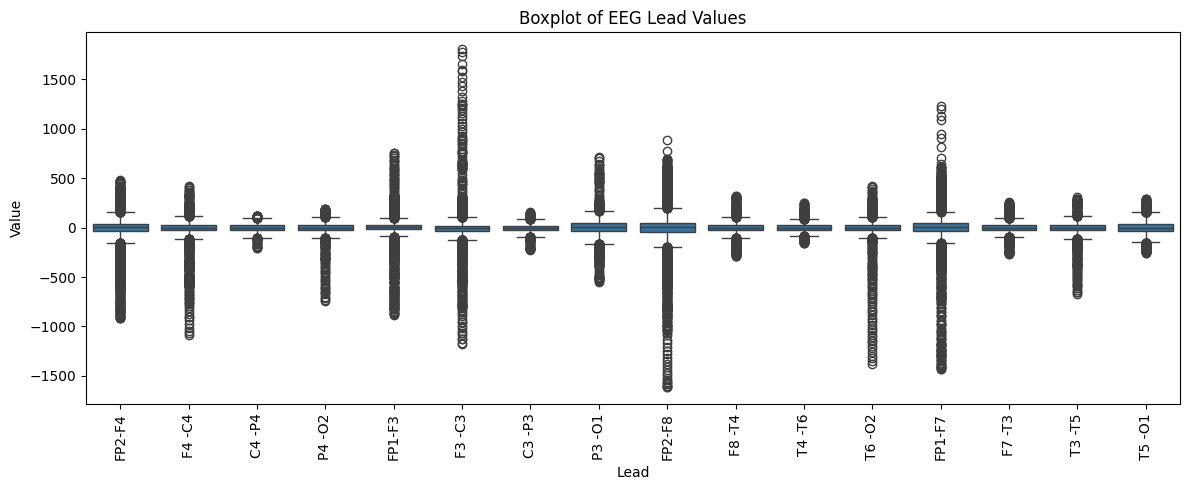

In [ ]:
import scipy.stats as stats

df_pre_melted = df_pre.melt(var_name='Lead', value_name='Value')

# Perform one-way ANOVA across leads
groups = [df_pre[col] for col in df_pre.columns]
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Optional: Visualize
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_pre_melted, x='Lead', y='Value')
plt.xticks(rotation=90)
plt.title("Boxplot of EEG Lead Values")
plt.tight_layout()
plt.show()

**Results:**

Are the mean values of EEG signals significantly different across the leads within the same condition (pre or post)?

H₀: All EEG leads (in pre or post) have the same mean.


| Metric          | Value                 | Interpretation                                                                                                                     |
| --------------- | --------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **F-statistic** | 9.2620                | Indicates the **ratio of between-lead variance to within-lead variance**. Higher means more difference between leads.              |
| **P-value**     | 3.86e-22 (very small) | Strong evidence that **at least one EEG lead** has a **mean significantly different** from the others in this group (e.g., "pre"). |


In [ ]:
df_post=pd.read_csv('/content/post_treatment_combined.csv')
df_post=df_post.drop([0,1])
df_post.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
2,-74.0,4.0,-16.0,-53.0,1.0,-15.0,-22.0,-32.0,-24.0,-47.0,-56.0,-13.0,-8.0,-43.0,7.0,-24.0
3,-92.0,0.0,-14.0,-31.0,-28.0,-5.0,-20.0,-26.0,-47.0,-42.0,-57.0,9.0,-28.0,-46.0,12.0,-17.0
4,-126.0,-3.0,-12.0,-12.0,-61.0,5.0,-17.0,-21.0,-89.0,-32.0,-57.0,24.0,-52.0,-48.0,18.0,-12.0
5,-163.0,-5.0,-10.0,-5.0,-85.0,10.0,-13.0,-18.0,-136.0,-19.0,-55.0,28.0,-72.0,-47.0,22.0,-9.0
6,-188.0,-6.0,-9.0,-8.0,-91.0,10.0,-10.0,-18.0,-171.0,-8.0,-53.0,20.0,-82.0,-45.0,23.0,-7.0


F-statistic: 39.4525
P-value: 3.8915e-116


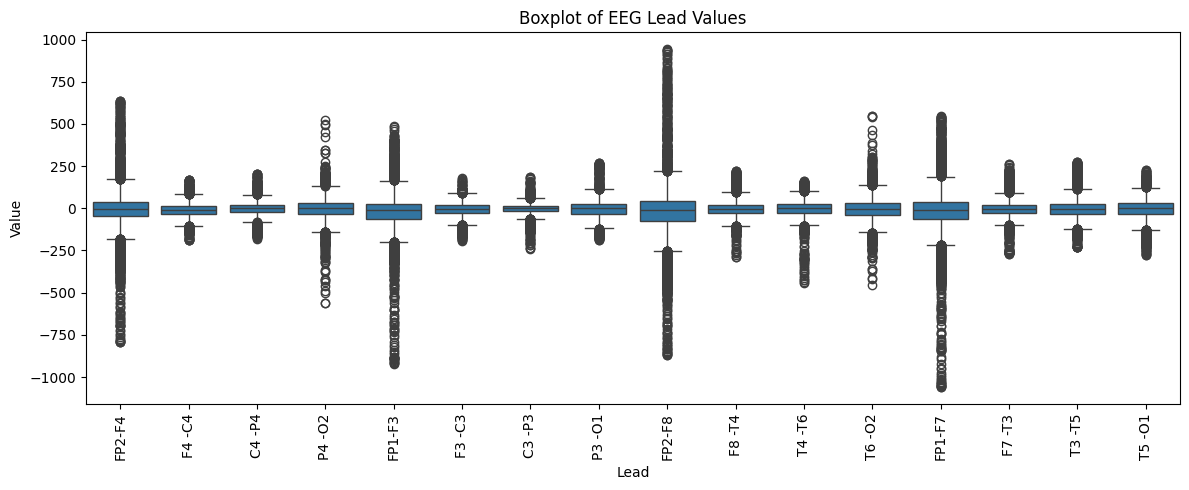

In [ ]:
df_post_melted = df_post.melt(var_name='Lead', value_name='Value')

# Perform one-way ANOVA across leads
groups = [df_post[col] for col in df_post.columns]
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Optional: Visualize
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_post_melted, x='Lead', y='Value')
plt.xticks(rotation=90)
plt.title("Boxplot of EEG Lead Values")
plt.tight_layout()
plt.show()

H₀: All EEG leads (in pre or post) have the same mean.

| Metric          | Value       | Interpretation                                                                      |
| --------------- | ----------- | ----------------------------------------------------------------------------------- |
| **F-statistic** | 39.4525     | Very large — strong between-group variance relative to within-group variance        |
| **P-value**     | 3.8915e-116 | Nearly zero — **extremely significant** differences between at least some EEG leads |



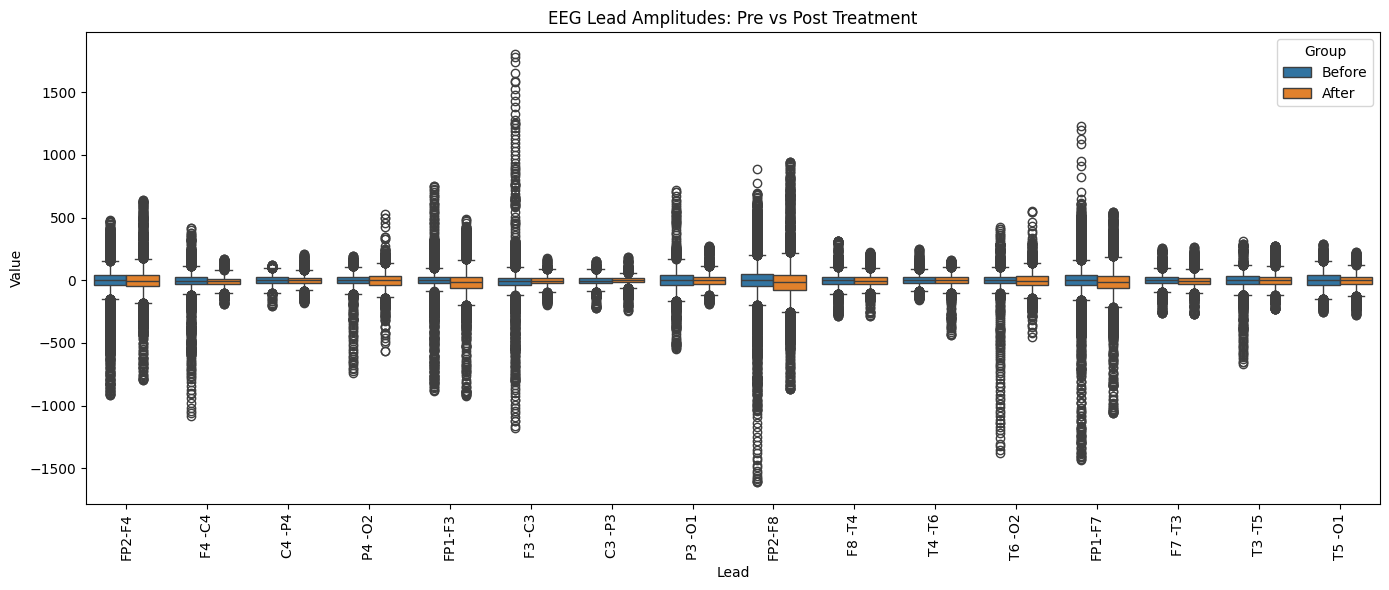

In [ ]:
df_pre['Group'] = 'Before'
df_post['Group'] = 'After'
df_combined = pd.concat([df_pre, df_post])
eeg_cols = df_combined.columns[:-1]  # all columns except 'Group'
df_combined_melted = df_combined.melt(id_vars='Group', value_vars=eeg_cols,
                                      var_name='Lead', value_name='Value')

# Perform one-way ANOVA across leads
#groups = [df_combined[col] for col in df_combined.columns]
#f_stat, p_val = stats.f_oneway(*groups)

#print(f"F-statistic: {f_stat:.4f}")
#print(f"P-value: {p_val:.4e}")

# Optional: Visualize
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined_melted, x='Lead', y='Value', hue='Group')
plt.xticks(rotation=90)
plt.title("EEG Lead Amplitudes: Pre vs Post Treatment")
plt.tight_layout()
plt.show()

In [ ]:
results = []
for lead in eeg_cols:
    pre_vals = df_pre[lead]
    post_vals = df_post[lead]
    t_stat, p_val = stats.ttest_ind(pre_vals, post_vals, equal_var=False)  # Welch's t-test
    results.append((lead, t_stat, p_val))

# Display sorted by p-value
results_df = pd.DataFrame(results, columns=['Lead', 't-statistic', 'p-value'])
print(results_df.sort_values('p-value'))

      Lead  t-statistic       p-value
4   FP1-F3     8.858082  9.022744e-19
15  T5 -O1     6.175542  6.766687e-10
14  T3 -T5    -6.007920  1.923585e-09
1   F4 -C4     5.308176  1.130255e-07
13  F7 -T3     3.790508  1.509146e-04
12  FP1-F7     3.660462  2.526253e-04
5   F3 -C3    -3.567349  3.625065e-04
10  T4 -T6     3.457762  5.461937e-04
8   FP2-F8     2.848673  4.396189e-03
9   F8 -T4    -2.172496  2.983371e-02
7   P3 -O1     1.543396  1.227602e-01
6   C3 -P3     1.508098  1.315508e-01
3   P4 -O2     1.200101  2.301188e-01
2   C4 -P4     0.591672  5.540792e-01
0   FP2-F4     0.312944  7.543277e-01
11  T6 -O2    -0.129405  8.970394e-01


**Null Hypothesis (H₀)**

There is no difference between the pre-treatment and post-treatment values for that EEG lead.

**P-Value?**

A p-value is the probability of observing results at least as extreme as your current data, assuming the null hypothesis is true.

| **P-Value** Range | **Interpretation**                                                                |
| ----------------- | --------------------------------------------------------------------------------- |
| **< 0.001**       | **Very strong evidence** against the null — extremely likely a real effect exists |
| **< 0.01**        | **Strong evidence** against the null — likely a real effect                       |
| **< 0.05**        | **Moderate evidence** against the null — possibly a real effect                   |
| **> 0.05**        | Not statistically significant — could be due to random chance                     |
| **> 0.1**         | Very weak evidence — likely no real effect                                        |


**Highly Significant Leads (p < 0.001)**

| Lead       | t-stat | p-value | Interpretation                       |
| ---------- | ------ | ------- | ------------------------------------ |
| **FP1-F3** | 8.86   | 9e-19   | Huge **increase** post-treatment     |
| **T5-O1**  | 6.18   | 6.8e-10 | Strong **increase** post-treatment   |
| **T3-T5**  | -6.01  | 1.9e-09 | Strong **decrease** post-treatment   |
| **F4-C4**  | 5.31   | 1.1e-07 | Strong **increase** post-treatment   |
| **F7-T3**  | 3.79   | 1.5e-04 | Moderate **increase** post-treatment |
| **FP1-F7** | 3.66   | 2.5e-04 | Moderate **increase** post-treatment |
| **F3-C3**  | -3.57  | 3.6e-04 | Moderate **decrease** post-treatment |
| **T4-T6**  | 3.46   | 5.5e-04 | Moderate **increase** post-treatment |


**Moderately Significant Leads (p < 0.05)**

| Lead       | t-stat | p-value | Interpretation                   |
| ---------- | ------ | ------- | -------------------------------- |
| **FP2-F8** | 2.85   | 0.0044  | Mild **increase** post-treatment |
| **F8-T4**  | -2.17  | 0.0298  | Mild **decrease** post-treatment |


**Not Statistically Significant (p ≥ 0.05)**




| Lead                                                              | t-stat         | p-value               | Interpretation |
| ----------------------------------------------------------------- | -------------- | --------------------- | -------------- |
| **P3-O1**, **C3-P3**, **P4-O2**, **C4-P4**, **FP2-F4**, **T6-O2** | t-stats near 0 | No significant change |                |


**Interpretation of t-statistic Signs**

Positive t-statistic: Higher average values in post-treatment → increase in activity.

Negative t-statistic: Lower average values in post-treatment → decrease in activity.

You tested many EEG leads. That increases the chance of false positives.

Use corrections like:

Bonferroni: Adjust alpha level by dividing by the number of tests.

FDR (False Discovery Rate): Less strict, more suitable for EEG data.

## **Poincare Plot**

In [ ]:
def poincare_plot(signal):
    x = signal[:-1]
    y = signal[1:]
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.xlabel('x(t)')
    plt.ylabel('x(t+1)')
    plt.title('Poincaré Plot')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    x = np.array(signal[:-1])
    y = np.array(signal[1:])
    diff = y - x

    sd1 = np.sqrt(np.var(diff) / 2)
    sd2 = np.sqrt(2 * np.var(signal) - sd1**2)
    print(f"SD1 (Short-term): {sd1:.4f}")
    print(f"SD2 (Long-term): {sd2:.4f}")


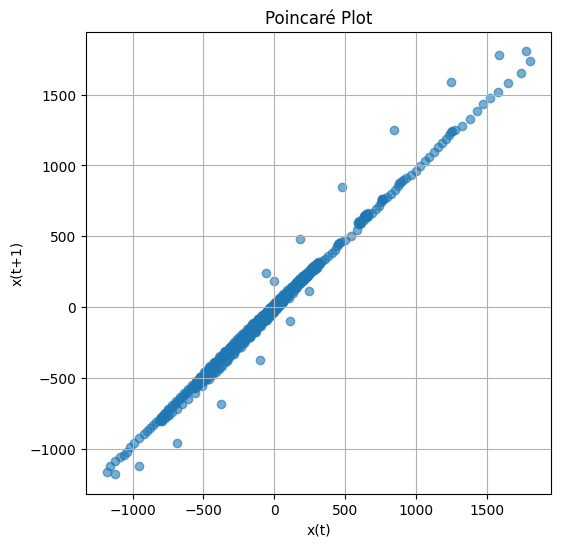

SD1 (Short-term): 9.9236
SD2 (Long-term): 197.0585


In [ ]:
poincare_plot(df_pre['F3 -C3'])

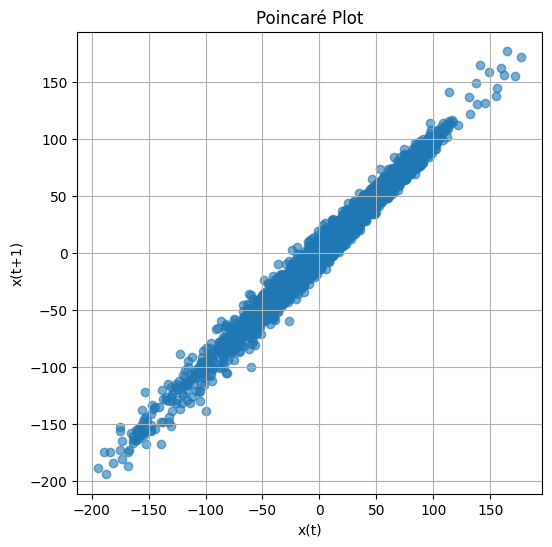

SD1 (Short-term): 4.1085
SD2 (Long-term): 55.6236


In [ ]:
poincare_plot(df_post['F3 -C3'])

**Interpreting a poincare plot**

| Shape                | Meaning                                        |
| -------------------- | ---------------------------------------------- |
| Elliptical & tight   | Regular, low variability (e.g., steady state)  |
| Wide or "comet-like" | High variability (e.g., dynamic/chaotic state) |
| Scattered or noisy   | Random or highly irregular process             |
